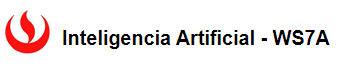

## NLP - Análisis de Sentimientos: Trump Banned from Twitter

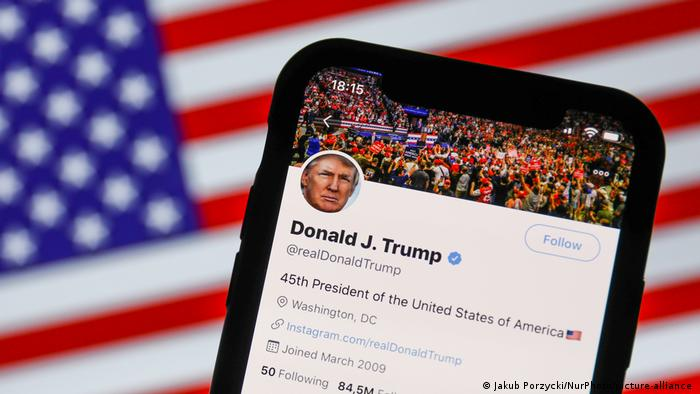

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx
from textblob import TextBlob

%matplotlib inline

### 1. Importación de datos (tweets)

In [ ]:
data = pd.read_csv('data/tweets-trump-c.csv')

In [ ]:
data.info()

In [ ]:
# Mantenemos en el df los tweets sin NA en la columna text_cleaned   
data = data[data['text_cleaned'].notna()]

In [ ]:
data.info()

In [ ]:
data.head()

### 2. Análisis de Sentimientos

Se puede utilizar textblob del paquete Python para calcular los valores de polaridad de los tweets individuales.
* Empezamos creando objetos textblob, que asignan valores de polaridad a los tweets. 
* Luego se identifica el valor de polaridad utilizando el atributo .polarity del objeto texblob.

In [ ]:
# definimos una funcion para analizar los sentimientos en cada texto del tweet
def analize_sentiment(tweet):
    '''
    Función de utilidad para clasificar la polaridad de un tweet
     usando textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

La forma en que funciona es que textblob ya proporciona un analizador entrenado (mucho más facil). **Textblob** puede trabajar con diferentes modelos de aprendizaje automático utilizados en el procesamiento del lenguaje natural. De todos modos, volviendo al código, solo agregaremos una columna adicional a nuestros datos. Esta columna contendrá el análisis de sentimiento y podemos trazar el dataframe para ver la actualización:

In [ ]:
# Creamos una columna con el resultado del análisis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['text_cleaned'] ])

data.head()

In [ ]:
# Cree un df que contenga el valor de polaridad y el texto del tweet
sentiment_df = data[['text_cleaned', 'SA']]

sentiment_df.head(15)

**Análisis de los resultados**

Para tener una forma sencilla de verificar los resultados, contaremos el número de tweets neutrales, positivos y negativos y extraeremos los porcentajes.

In [ ]:
pos = len(sentiment_df[sentiment_df['SA'] > 0]. value_counts())
neu = len(sentiment_df[sentiment_df['SA'] == 0]. value_counts())
neg = len(sentiment_df[sentiment_df['SA'] < 0]. value_counts())
tot =  pos+neu+neg
#print (pos, neu, neg, pos+neu+neg)

Imprimimos los porcentajes:

In [ ]:
# Visualizamos los %:

print("Porcentaje de tweets positivos : {}%".format(round(pos/tot*100,2)))
print("Porcentaje de tweets neutrales : {}%".format(round(neu/tot*100,2)))
print("Porcentaje de tweets negativos : {}%".format(round(neg/tot*100,2)))

Estos valores de polaridad se pueden trazar en un histograma, lo que puede ayudar a resaltar el sentimiento general (es decir, más positividad o negatividad) hacia el sujeto.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentimentos de Tweets sobre Trump Banned en Twitter")
plt.show()

### 3. Nube de Palabras (WordCloud)

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
text = " ".join(tweet for tweet in sentiment_df['text_cleaned'])
print ("Existen {} palabras al combinar todos los tweets limpios.".format(len(text)))

In [ ]:
stopwords = set(STOPWORDS)
# Eliminaremos las palabras de coleccon 
stopwords.update(["trump", "trumpbanned", "wearetrump", "realdonaldtrump"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="GhostWhite", width=800, height=800, margin=2,collocations=False,
                      font_step=2).generate(text)

In [ ]:
plt.figure(figsize=(16,9), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Wordcloud (Nube de Palabras) sobre Trump Banned en Twitter")
plt.show()

### 4. Ubicación de los tweets en un mapa

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio

fig = px.scatter_geo(data, lat='Lat', lon='Lon', 
                     color='place-country', #size='New cases', size_max=20,
                     hover_name='user-screen_name', 
                     hover_data=[ 'text_cleaned',  'place-country',
                                 'user-location'], template='seaborn')

fig.update_layout(
    title_text = "Subconjunto de tweets con ubicación exacta",
    
    geo=dict(showframe=False, showcoastlines=False, 
             projection_type='equirectangular'),
    
    annotations = [dict(x=-0.04, y=0.95, xref='paper', yref='paper',
        text='Del total de tweets, solo el ~ 7% incluye ' \
                'la ubicación exacta. Esta proporción se mantiene siempre.', showarrow = False)]
)

fig.update_geos(resolution=110, showcountries=True, 
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])
fig.show()